# AGH Modelling of Physical Systems Lab 3 (2025 March 18th)
Sylwester Arabas (sylwester.arabas@agh.edu.pl)

**1. advection PDE**

Let's introduce a few symbols:   
* ${\color{red}t}$: time   
* ${\color{blue}x}$: physical coordinate (e.g., distance or altitude)   
* ${\color{green}\psi}({\color{blue}x})$: scalar field (e.g., pollutant concentration)   
* ${\color{brown}u}$: carrier velocity field (e.g., wind)   

Transport of $\color{green}\psi$ due to advection by $\color{brown}u$ can be modelled with the advection equation:
$$ \partial_{\color{red} t} {\color{green}\psi} + \partial_{\color{blue}x} \left({\color{brown}u} {\color{green}\psi}\right) = 0 $$

For the special case of $\partial_{\color{blue}x} {\color{brown}u}=0$, an analytical solution describing translation of the signal is readily available:
$$ {\color{green}\psi}({\color{blue}x}, {\color{red}t})=\psi_0({\color{blue}x} - {\color{brown}u}{\color{red}t})$$
where $\psi_0({\color{blue}x})={\color{green}\psi}({\color{blue}x}, 0)$. 

Let's depict the problem using NumPy and matplotlib:

In [13]:
import numpy as np
from matplotlib import pyplot

In [14]:
class Psi_0:
    def __init__(self):
        self.x0 = 5
        self.a = 1
        self.sigma = 25
    def __call__(self, x):
        return self.a * np.exp(-(x-self.x0)**2 / 2 / self.sigma**2)

In [15]:
psi_0 = Psi_0()
nx = 64
x, dx = np.linspace(-100, 300, nx, endpoint=False, retstep=True)
u = 2
t_max = 50
dx

np.float64(6.25)

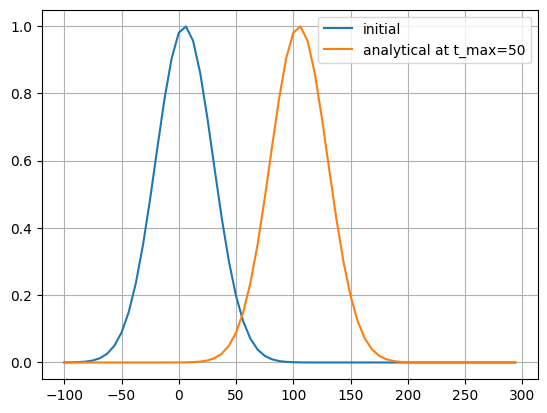

In [16]:
pyplot.plot(x, psi_0(x), label='initial')
pyplot.plot(x, psi_0(x - u * t_max), label=f'analytical at {t_max=}')
pyplot.legend()
pyplot.grid()

**2. overview of applications**

* **computational fluid dynamics**: Navier-Stokes momentum equation ($\psi$: fluid momentum)
* **fluid thermodynamics**: energy conservation ($\psi$: thermal energy)
* **atmospheric modelling incl. weather prediction**: mass conservation ($\psi$: humidity, rain, pollutants, ...)
* **derivative pricing in financial mathematics**: Black-Scholes equation ($\psi$: discounted value of a derivative instrument)
* ...

**3. simple numerical solution using the "upwind" scheme coded in Python**

For cases where the velocity varies in space (and for many other more complex cases), numerical integration is the only way of solving the advection PDE. Among numerous numerical schemes for solving it, let's look at the basic [**upwind**](https://en.wikipedia.org/wiki/Upwind_scheme) solver: 

Let's consider the following discretisation of the problem:   
* ${\color{red}n} = \frac{\color{red}t}{\Delta t} \in 0, 1, \ldots$   
* ${\color{blue}i} = \frac{\color{blue}x}{\Delta x} \in 0, 1, \ldots$   
* ${\color{brown}C} = {\color{brown}u}\frac{\Delta t}{\Delta x}$ (so called Courant number)   
* ${\color{green}\psi}_{\color{blue}i}^{\color{red}n}$: scalar field at "grid cell" $\color{blue}i$ in space at time "level" ${\color{red}n}$   

The explicit (forward-in-time) upwind scheme is defined as:
$$
  {\color{green}\psi}^{{\color{red}n}+1}_{\color{blue}i} = {\color{green}\psi}^{\color{red}n}_{\color{blue}i} - \left[F\left({\color{green}\psi}^{\color{red}n}_{\color{blue}i},  {\color{green}\psi}^{\color{red}n}_{{\color{blue}i}+1}, {\color{brown}C}\right)-F\left({\color{green}\psi}^{\color{red}n}_{{\color{blue}i}-1},{\color{green}\psi}^{\color{red}n}_{\color{blue}i}, {\color{brown}C}\right)\right]
$$
$$F(\psi_L, \psi_R, C)=\frac{C+|C|}{2}\psi_L + \frac{C-|C|}{2}\psi_R$$

**4. upwind algorithm coded in Python/NumPy: functions and a useful structure**

**5. upwind algorithm coded in Python/NumPy: data/objects**

**6. upwind algorithm coded in Python/NumPy: time-stepping loop**

In [17]:
def F(L,R,C):
    return 0.5 * (C+ abs(C)) * L + 0.5 * (C - abs(C)) * R

In [18]:
class One:
    def __radd__(self, other:slice):
        return slice(other.start +1 , other.stop + 1)
    def __rsub__(self, other:slice):
        return slice(other.start - 1, other.stop - 1)

In [19]:
nt= 32
dt = t_max / nt
one = One()
i = slice(1, nx-2)
C = u * dt / dx
psi=psi_0(x)
for _ in range(nt):
    psi[i] = psi[i] - (F(psi[i],psi[i+one],C) - F(psi[i-one],psi[i],C)) 

In [20]:
dt

1.5625

**7. comparing analytic and numerical solutions**

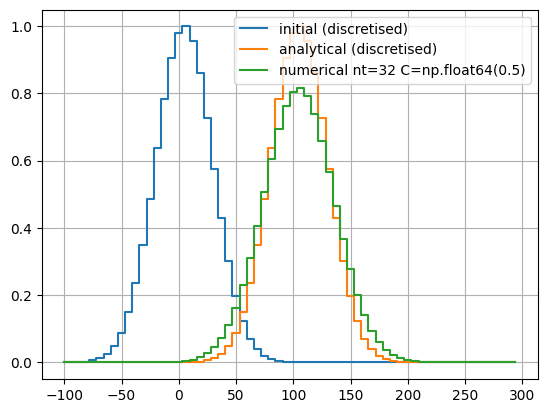

In [21]:
pyplot.step(x, psi_0(x), label='initial (discretised)', where='mid')
pyplot.step(x, psi_0(x-u*t_max), label='analytical (discretised)', where='mid')
pyplot.step(x, psi, label=f'numerical {nt=} {C=}', where='mid')
pyplot.legend()
pyplot.grid()

---

Assignment
---

For now, let's keep Courant number equal to 0.5  
$C= 0.5$, $u=2$, $n_t=32$

In [22]:
nt=32
u = 2

In [ ]:
def get_psi(nx, x, nt, C):
    one = One()
    i = slice(1, int(nx)-2)
    psi=psi_0(x)
    for _ in range(nt):
        psi[i] = psi[i] - (F(psi[i],psi[i+one],C) - F(psi[i-one],psi[i],C)) 
    return psi

In [91]:
x, dx = np.linspace(-100, 300, nx, endpoint=False, retstep=True)
x,dx

(array([-100.  ,  -93.75,  -87.5 ,  -81.25,  -75.  ,  -68.75,  -62.5 ,
         -56.25,  -50.  ,  -43.75,  -37.5 ,  -31.25,  -25.  ,  -18.75,
         -12.5 ,   -6.25,    0.  ,    6.25,   12.5 ,   18.75,   25.  ,
          31.25,   37.5 ,   43.75,   50.  ,   56.25,   62.5 ,   68.75,
          75.  ,   81.25,   87.5 ,   93.75,  100.  ,  106.25,  112.5 ,
         118.75,  125.  ,  131.25,  137.5 ,  143.75,  150.  ,  156.25,
         162.5 ,  168.75,  175.  ,  181.25,  187.5 ,  193.75,  200.  ,
         206.25,  212.5 ,  218.75,  225.  ,  231.25,  237.5 ,  243.75,
         250.  ,  256.25,  262.5 ,  268.75,  275.  ,  281.25,  287.5 ,
         293.75]),
 np.float64(6.25))

In [24]:
def RMSE(a, b):
    return np.sqrt(np.mean((a-b)**2))

In [178]:
def generate_by_dx(dx, C_const, u_const,nt_cont):
    nx = int(400 / dx)
    x, dx_ = np.linspace(-100, 300, nx, endpoint=False, retstep=True)
    dt = C_const * dx / u_const
    psi = get_psi(nx, x, nt_cont, C_const)
    analytical = psi_0(x - u_const * dt * nt_cont)
    return x,psi, analytical

In [179]:
def generate_by_dt(dt, C_const, u_const,nt_cont):
    dx = u_const * dt / C_const
    t_max = dt * nt_cont
    nx = int(400 / dx)
    x, dx = np.linspace(-100, 300, nx, endpoint=False, retstep=True)
    psi = get_psi(nx, x, nt_cont, C_const)
    
    analytical = psi_0(x - u_const * t_max)
    return x,psi, analytical

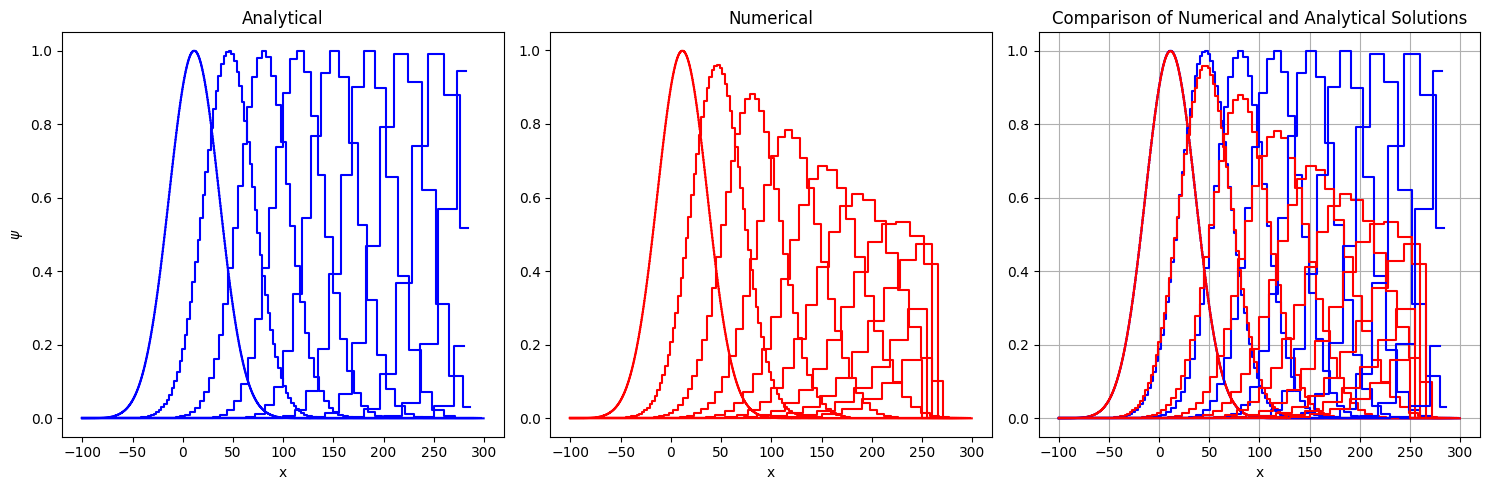

In [ ]:
t_values = np.linspace(0.1, 5, 10)
fig, axs = pyplot.subplots(1, 3, figsize=(15, 5))

for idx, t in enumerate(t_values):
    x_, psi_numerical, psi_analytical = generate_by_dt(t, C_const=0.5, u_const=2, nt_cont=32)
    
    axs[0].step(x_, psi_analytical, where='mid', label='Analytical', color='blue')
    axs[0].set_title('Analytical')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel(r'$\psi$')
    axs[0].grid()

    axs[1].step(x_, psi_numerical, where='mid', label='Numerical', color='red')
    axs[1].set_title('Numerical')
    axs[1].set_xlabel('x')
    axs[1].grid()

    axs[2].step(x_, psi_analytical, where='mid', label='Analytical', color='blue')
    axs[2].step(x_, psi_numerical, where='mid', label='Numerical', color='red')
    axs[2].set_title('Analytical and Numerical')
    axs[2].set_xlabel('x')
    axs[2].grid()

pyplot.title('Comparison of Numerical and Analytical Solutions')
pyplot.grid()
pyplot.tight_layout()
pyplot.show()

In [ ]:
t_values = np.linspace(0.1, 5, 10_000)
results_rmse_t = []
for dt_val in t_values:
    x_arr, psi, analytical = generate_by_dt(dt_val, C_const=0.5, u_const=2, nt_cont=32)
    results_rmse_t.append(RMSE(psi, analytical))

Text(0, 0.5, 'RMSE')

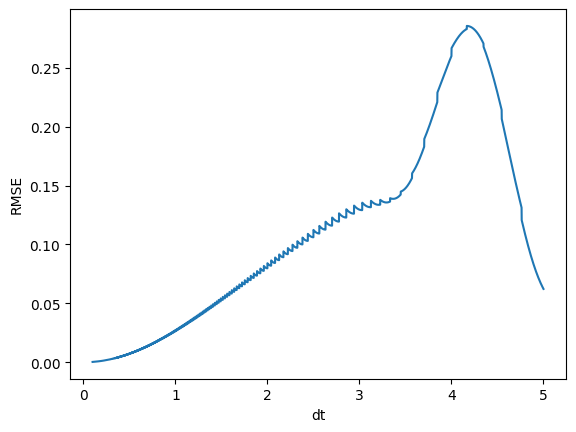

In [196]:
pyplot.plot(t_values, results_rmse_t)
pyplot.xlabel('dt')
pyplot.ylabel('RMSE')

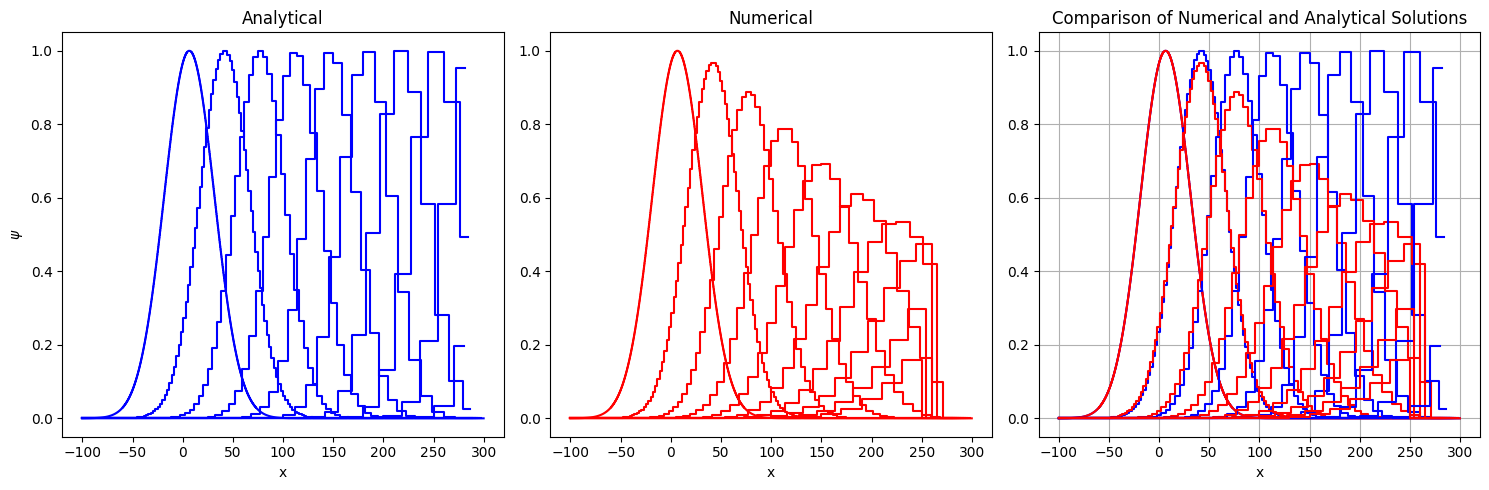

In [ ]:
x_values = np.linspace(0.1, 20, 10)
fig, axs = pyplot.subplots(1, 3, figsize=(15, 5))
for idx, x in enumerate(x_values):
    x_, psi_numerical, psi_analytical = generate_by_dx(x, C_const=0.5, u_const=2, nt_cont=32)

    
    axs[0].step(x_, psi_analytical, where='mid', label='Analytical', color='blue')
    axs[0].set_title('Analytical')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel(r'$\psi$')
    axs[0].grid()

    axs[1].step(x_, psi_numerical, where='mid', label='Numerical', color='red')
    axs[1].set_title('Numerical')
    axs[1].set_xlabel('x')
    axs[1].grid()

    axs[2].step(x_, psi_analytical, where='mid', label='Analytical', color='blue')
    axs[2].step(x_, psi_numerical, where='mid', label='Numerical', color='red')
    axs[2].set_title('Analytical and Numerical')
    axs[2].set_xlabel('x')
    axs[2].grid()

pyplot.title('Comparison of Numerical and Analytical Solutions')
pyplot.grid()
pyplot.tight_layout()
pyplot.show()

In [201]:
x_values = np.linspace(0.1, 20, 10_000)
results_rmse_x = []
for dx_val in x_values:
    x_arr, psi, analytical = generate_by_dx(dx_val, C_const=0.5, u_const=2, nt_cont=32)
    results_rmse_x.append(RMSE(psi, analytical))

Text(0, 0.5, 'RMSE')

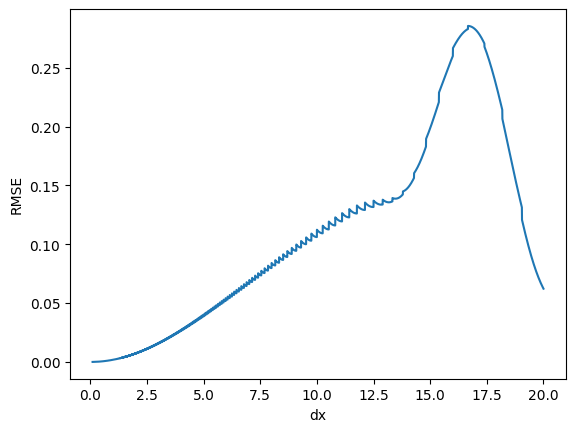

In [202]:
pyplot.plot(x_values, results_rmse_x)
pyplot.xlabel('dx')
pyplot.ylabel('RMSE')

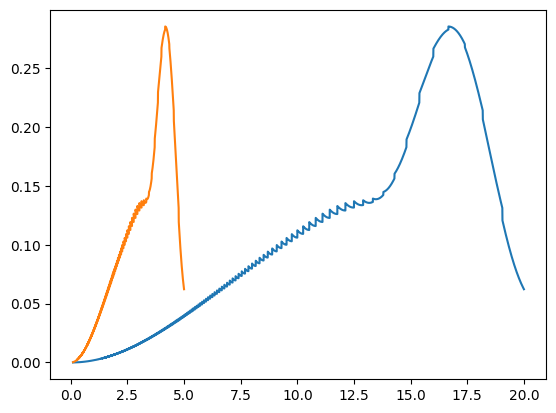

In [203]:
pyplot.plot(x_values, results_rmse_x)
pyplot.plot(t_values, results_rmse_t)

As we can see, near $0$ values in both $d_t$ and $d_x$ result in RMSE $\approx 0$. When the step values increase, so does the error up until the step is too big to faithfully reflect the nature of the function 

It's unfeasible to calculate for higher values of $dx$ and $dt$ due to the too large steps, causing strange behavior, making function unreadable and useless.

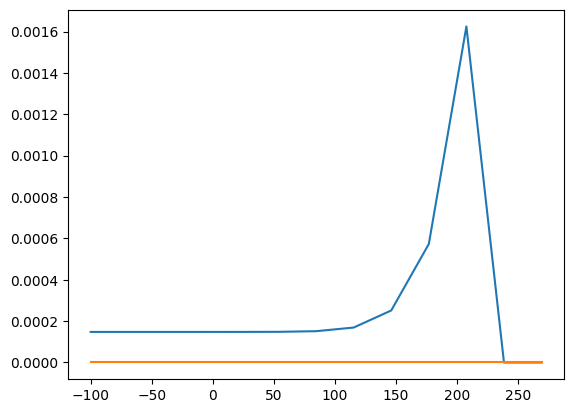

In [197]:
x_,psi_,an_ = generate_by_dx(30, C_const=0.5, u_const=2, nt_cont=32)
pyplot.plot(x_, psi_, label='numerical')
pyplot.plot(x_, an_, label='analytical')